# 轮廓：更多属性

### 目标

在本章中，我们将学习
- 凸性缺陷以及如何找到它们 
- 查找点到多边形的最短距离 
- 匹配不同的形状

### 理论和代码
#### 1. 凸性缺陷

我们看到了关于轮廓的第二章的凸包。从这个凸包上的任何偏差都可以被认为是凸性缺陷。
OpenCV有一个函数来找到这个,**cv.convexityDefects**()。一个基本的函数调用如下:

```python
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
```

> **注意**
记住,我们必须在发现凸包时,传递`returnPoints= False`,以找到凸性缺陷。

它返回一个数组，其中每行包含这些值—**[起点、终点、最远点、到最远点的近似距离]**。我们可以用图像把它形象化。我们画一条连接起点和终点的线，然后在最远处画一个圆。记住，返回的前三个值是cnt的索引。所以我们必须从cnt中获取这些值。

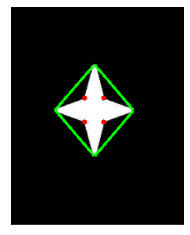

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

org = cv.imread('data/star.jpg', 0)

ret,thresh = cv.threshold(org,127,255,cv.THRESH_BINARY)

contours,hierarchy = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cnt = contours[0]

hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)

img = cv.cvtColor(org, cv.COLOR_GRAY2BGR)

for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    cv.line(img,start,end,[0,255,0],2)
    cv.circle(img,far,3,[255,0,0],-1)

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

#### 2. 点多边形测试

这个函数找出图像中一点到轮廓线的最短距离。它返回的距离，点在轮廓线外时为负，点在轮廓线内时为正，点在轮廓线上时为零。

例如，我们可以检查点`(50,50)`如下:

In [2]:
dist = cv.pointPolygonTest(cnt,(50,50),True)
print(dist)

-52.80151512977634


在函数中，第三个参数是measureDist。如果它是真的，它会找到有符号的距离。如果为假，则查找该点是在轮廓线内部还是外部(分别返回+1、-1和0)。

> **注意**
  如果您不想找到距离，请确保第三个参数为False，因为这是一个耗时的过程。因此，将其设置为False可使速度提高2-3倍。

#### 3. 形状匹配

OpenCV附带一个函数**cv.matchShapes**()，该函数使我们能够比较两个形状或两个轮廓，并返回一个显示相似性的度量。结果越低，匹配越好。它是根据矩值计算出来的。不同的测量方法在文档中有解释。

0.0011008654299049514
0.00909499457231333
0.33018962323960144


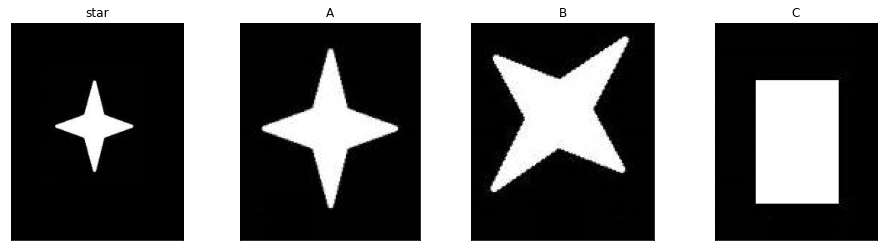

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('data/star.jpg',0)
img1 = cv.imread('data/star1.jpg',0)
img2 = cv.imread('data/star2.jpg',0)
img3 = cv.imread('data/star3.jpg',0)

ret, thresh = cv.threshold(img, 127, 255,0)
ret, thresh1 = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
ret, thresh3 = cv.threshold(img3, 127, 255,0)

contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]

contours,hierarchy = cv.findContours(thresh1,2,1)
cnt1 = contours[0]

contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]

contours,hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours[0]

ret1 = cv.matchShapes(cnt,cnt1,1,0.0)
print( ret1 )

ret2 = cv.matchShapes(cnt,cnt2,1,0.0)
print( ret2 )

ret3 = cv.matchShapes(cnt,cnt3,1,0.0)
print( ret3 )

plt.figure(figsize=(16, 4))

plt.subplot(141),plt.imshow(img, 'gray'),plt.title('star')
plt.xticks([]), plt.yticks([])
plt.subplot(142),plt.imshow(img1, 'gray'),plt.title('A')
plt.xticks([]), plt.yticks([])
plt.subplot(143),plt.imshow(img2, 'gray'),plt.title('B')
plt.xticks([]), plt.yticks([])
plt.subplot(144),plt.imshow(img3, 'gray'),plt.title('C')
plt.xticks([]), plt.yticks([])

plt.show()

我尝试过匹配下面给出的不同形状的形状：


我得到以下结果:
- 匹配的图像A与本身= 0.00110
- 匹配图像A与图像B = 0.00909
- 匹配图像A与图像C = 0.33019

看,即使是图像旋转也不会对这个比较产生很大的影响。

**参考**
Hu矩是平移、旋转和比例不变的七个矩。第七个是无偏斜量。这些值可以使用**cpu.HuMoments**()函数找到。

### 附加资源

### 练习

1. 检查文档中的**cv.pointPolygonTest**()，您可以找到红色和蓝色的漂亮图像。它表示从所有像素到白色曲线的距离。曲线内的所有像素都是蓝色的，这取决于距离。外面的点也是红色的。轮廓边缘用白色标记。所以问题很简单。编写一个代码来创建这样的距离表示。

2. 使用**cv.matchShapes**()比较数字或字母的图像。(这是迈向OCR的简单一步)